# Laptop Data Analysis, Mining 

## Agenda :

* Analyse Laptop data.
* Add more features to data (like RAM, Storage, Graphics, etc..)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv("laptop_details.csv")
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...


In [3]:
df['Feature'][1]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [4]:
# First lets add spaces in Feature Column:
df['Feature'] = df['Feature'].str.replace(r'(Processor \(.+\))(\d+)', r'\1 \2') 
df['Feature'] = df['Feature'].str.replace(r'(RAM)(\d+)', r'\1 \2') 
df['Feature'] = df['Feature'].str.replace(r'(System)(\d+)', r'\1 \2') 

<ipython-input-4-c9669bbc5f2d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Feature'] = df['Feature'].str.replace(r'(Processor \(.+\))(\d+)', r'\1 \2')
<ipython-input-4-c9669bbc5f2d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Feature'] = df['Feature'].str.replace(r'(RAM)(\d+)', r'\1 \2')
<ipython-input-4-c9669bbc5f2d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Feature'] = df['Feature'].str.replace(r'(System)(\d+)', r'\1 \2')


In [5]:
df['Feature'][1]

'Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [6]:
# Lets extract features like RAM, OS, Storage, Display, Warranty from Feature Column using REGEX.
import re 

df['RAM_Size'] = df['Feature'].str.extract(r'(\d+)(?:\sGB)?\s(?:DDR\d)?\sRAM') 
df['OS'] = df['Feature'].str.extract(r'([A-Za-z]+\s+\d+(?:\.\d+)?(?:\s+\w+)?(?:\s+\d+)?(?:\s+\w+)?)\sOperating System') 
df['DDR_Version'] = df['Feature'].str.extract(r'(DDR\d)') 
df['Storage'] = df['Feature'].str.extract(r'(\d+)\s*(?:GB|TB)\s+SSD') 


In [7]:
df

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,DDR4,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,DDR4,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,DDR4,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM 6...,8,Windows 10,DDR4,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen) 8 GB DDR4 R...,8,RAMWindows 11,DDR4,512
...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,NaN,NaN,DDR4,NaN
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM 6...,8,Windows 11,DDR4,512
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM ...,16,Windows 11,DDR5,1
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen) 16 GB LPDDR...,NaN,Windows 11,DDR5,512


In [8]:
rat_nul = df["Rating"].isnull().sum()
rat_nul/len(df) * 100 # 20% missing data.
df['Rating'].describe()
# Fill null values with median = 4.3
df['Rating'] = df['Rating'].fillna(4.3)

<AxesSubplot:>

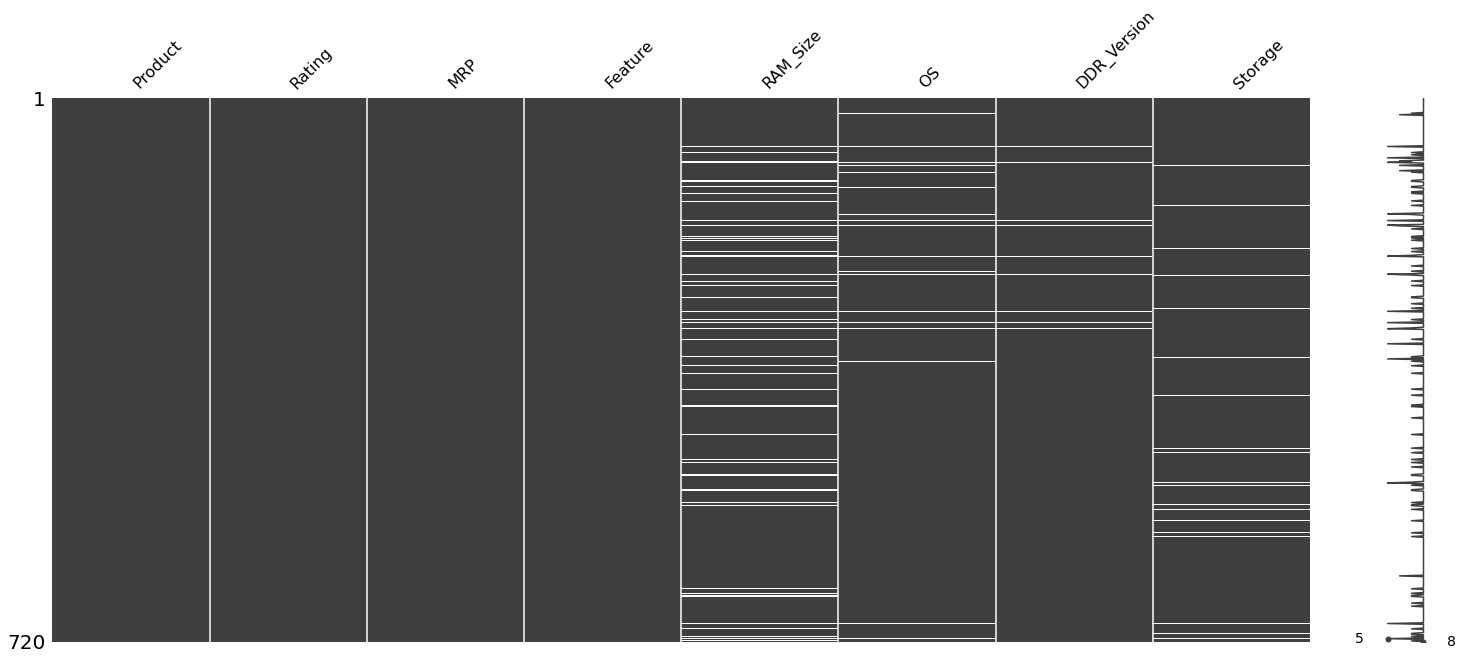

In [9]:
import missingno as mno
mno.matrix(df)

Something is utterly wrong with display feature

In [10]:
df['RAM_Size'].value_counts() # 8 is most repeating, lets fill it in NaN
df['RAM_Size'] = df['RAM_Size'].fillna('8')
df['RAM_Size'] = df['RAM_Size'].astype(int)

In [11]:
df['RAM_Size'].describe()

count    720.000000
mean      10.911111
std        4.958003
min        4.000000
25%        8.000000
50%        8.000000
75%       16.000000
max       32.000000
Name: RAM_Size, dtype: float64

In [12]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', 'RAMWindows 11', nan, 'RAMWindows 10',
       'RAM 64 bit DOS', 'RAM 64 bit Chrome'], dtype=object)

OS names are improper at some parts, so lets fix them :

In [13]:
df['OS'] = df['OS'].replace('RAMWindows 11','Windows 11')
df['OS'] = df['OS'].replace('RAMWindows 10','Windows 10')
df['OS'] = df['OS'].replace('RAM 64 bit DOS','64 bit DOS')
df['OS'] = df['OS'].replace('RAM 64 bit Chrome','64 bit Chrome')

In [14]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', nan, '64 bit DOS', '64 bit Chrome'],
      dtype=object)

In [15]:
df['OS'].isnull().sum()

27

In [16]:
df['OS'].describe()

count            693
unique             4
top       Windows 11
freq             561
Name: OS, dtype: object

In [17]:
df['OS'].value_counts()

Windows 11       561
Windows 10       129
64 bit DOS         2
64 bit Chrome      1
Name: OS, dtype: int64

In [18]:
df['MRP'].dtype

dtype('O')

In [19]:
df.loc[df['OS'] == '64 bit Chrome']

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,"₹28,490",Intel Celeron Dual Core Processor4 GB LPDDR4X ...,8,64 bit Chrome,DDR4,NaN


In [20]:
df[df['OS'].isnull()]
# Laptops costing less than 25990 are Chromebooks with 64 bit Chrome OS. Rest are MacOS.

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage
20,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,4.7,"₹88,990",Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,8,NaN,DDR4,256
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,"₹19,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,8,NaN,DDR4,256
64,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...,4.7,"₹1,39,990",Apple M2 Processor8 GB Unified Memory RAMMac O...,8,NaN,NaN,512
79,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,"₹1,81,990",Apple M1 Pro Processor16 GB Unified Memory RAM...,8,NaN,NaN,512
85,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,5.0,"₹1,39,990",Apple M2 Processor8 GB Unified Memory RAMMac O...,8,NaN,NaN,512
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,4.3,"₹19,490",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,4,NaN,DDR4,NaN
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,4.3,"₹19,490",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,4,NaN,DDR4,NaN
98,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,4.7,"₹88,990",Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,8,NaN,DDR4,256
118,APPLE MacBook Air M1 - (16 GB/512 GB SSD/Mac O...,4.7,"₹1,24,990",Apple M1 Processor16 GB DDR4 RAMMac OS Operati...,16,NaN,DDR4,512
124,APPLE MacBook Air M1 - (8 GB/512 GB SSD/Mac OS...,4.7,"₹1,04,990",Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,8,NaN,DDR4,512


In [21]:
# Most of Laptops without OS are Apple,Chromebook so lets conditionally fill in data :
# Laptops priced less than 30,000 get 64 bit DOS, others get MacOS
# But first, remove ₹ symbol from MRP....
df['MRP'] = df['MRP'].replace('₹','',regex = True)
df['MRP'] = df['MRP'].replace(',','',regex = True)

df['MRP'] = df['MRP'].astype(int) # TypeCasting to INT.
# Lets go, we have formatted MRP to Integer, removed ₹.

In [22]:
df.loc[(df['MRP']<= 25990) & (df['OS'].isnull()), 'OS'] = '64 bit Chrome'

In [23]:
df[df['OS'].isnull()] # Now we are only left with APPLE Products, so lets give MacOS to them 
df['OS'] = df['OS'].fillna('MacOS')

In [24]:
df['OS'].unique()

array(['Windows 11', 'Windows 10', 'MacOS', '64 bit Chrome', '64 bit DOS'],
      dtype=object)

In [25]:
df['OS'].value_counts()

Windows 11       561
Windows 10       129
MacOS             19
64 bit Chrome      9
64 bit DOS         2
Name: OS, dtype: int64

<AxesSubplot:>

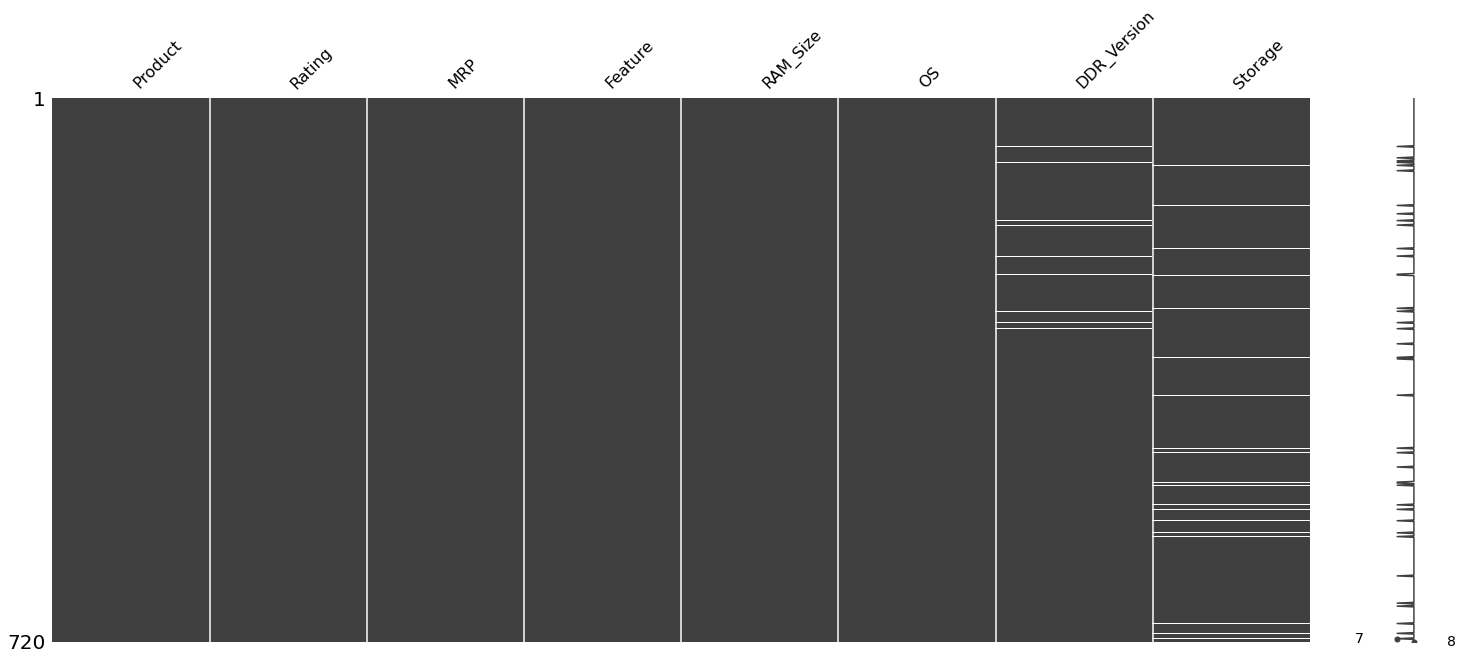

In [26]:
mno.matrix(df)

In [27]:
df['DDR_Version'].isnull().sum()

12

In [28]:
df[df['DDR_Version'].isnull()]
# ALL APPLE PRODUCTS DON'T HAVE DDR VERSIONS.
# AFTER SOME WEB SEARCHING : Majority of Apple products ddr versions are DDR4
df['DDR_Version'] = df['DDR_Version'].fillna("DDR4") 

In [29]:
df['DDR_Version'].unique()

array(['DDR4', 'DDR5', 'DDR3'], dtype=object)

In [30]:
# WE Don't need DDR before all DDR_Version columns, so lets rename them :
df['DDR_Version'] = df['DDR_Version'].replace('DDR4',4)
df['DDR_Version'] = df['DDR_Version'].replace('DDR5',5)
df['DDR_Version'] = df['DDR_Version'].replace('DDR3',3)

df['DDR_Version'].unique()

array([4, 5, 3], dtype=int64)

In [31]:
# Lets fix Storage column :
df['Storage'].isnull().sum()

27

In [32]:
df['Storage'].unique()

array(['256', '512', '1', nan, '128', '2'], dtype=object)

In [33]:
idx_storagenull = df[df['Storage'].isnull()].index

df['Feature'].iloc[idx_storagenull].unique()

array(['Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System 35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty',
       'Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System 35.56 cm (14 Inch) Display1 Year Carry-in Warranty',
       'Processor: AMD Ryzen 3-3250U (2.60 GHz up to 3.50 GHz)RAM & Storage: 8GB DDR4 (2 DIMM Slots) & 1TB HDDSoftware: Win 11 + Office H&S 2021Display: 14.0" FHD WVA AG Narrow BorderPorts: USB 3.2 Gen 1 (x2), USB2.0 (x1), HDMI 1.4, SD Media Card Reader (SD, SDHC, SDXC), RJ45 - 10/100MbpsWiFi & BT: 802.11ac 1x1 WiFi and BluetoothAMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM 64 bit Windows 11 Operating System 1 TB HDD88.9 cm (35 cm) DisplayMicrosoft Office Home and Student 20211 Year Onsite Warranty1 Year Onsite Warranty',
       'Intel Core i3 Processor (10th Gen) 8 GB DDR4 RAM 64 bit Windows 10 Operating System 1 TB HDD39.62 cm (15.6 inch) DisplayMicrosoft Office Home and Student 2019, Splen

Majority of Laptops with missing Storage have 1TB HDD Storage, few deviations can be ignored (Hopefully).

In [34]:
df['Storage'] = df['Storage'].fillna('1024')
df['Storage'].isnull().sum()

0

In [35]:
# Lets add a storage_type column to df too. 
st_type_regex = r'(\d+)\s+([A-Za-z]+)\s+SSD'
df['storage_type'] = df['Feature'].apply(lambda x: re.findall(r'SSD|HDD', x)[0] if re.findall(r'SSD|HDD', x) else None)
df

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage,storage_type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,256,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM 6...,8,Windows 10,4,512,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,8,64 bit Chrome,4,1024,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM 6...,8,Windows 11,4,512,SSD
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM ...,16,Windows 11,5,1,SSD
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen) 16 GB LPDDR...,8,Windows 11,5,512,SSD


In [36]:
df['storage_type'].unique()
df['storage_type'].isnull().sum()

10

In [37]:
df[df['storage_type'].isnull()]
# These all are old and small scale laptops, so lets fill HDD.
df['storage_type'] = df['storage_type'].fillna('HDD')

In [38]:
df['Storage'].dtype # Lets cast it into int:
df['Storage'] = df['Storage'].astype(int) 
df['Storage'].dtype 

dtype('int32')

In [39]:
# Lets also add a Processor Column :
df['Processor'] = df['Feature'].str.extract(r'(?i)(i\d|(?<!Ryzen )M\d|Ryzen\s*[34579])')
df['Processor'].value_counts()
df['Processor'] = df['Processor'].replace('i1','i7')
df['Processor'].isnull().sum() # 33 null.
df[df['Processor'].isnull()]
# It is clear that all these laptops are Very old and small scale.
# They have slowest Processors like Athlon, Celeron, Pentium.
# So, lets fill 'legacy' to null values.
df['Processor'] = df['Processor'].fillna('Legacy')

In [40]:
df['Processor'].value_counts()

i5         159
i3         135
Ryzen 5     91
Ryzen 9     87
Ryzen 7     81
i7          56
Ryzen 3     48
Legacy      33
M1          14
i9          11
M2           5
Name: Processor, dtype: int64

<AxesSubplot:>

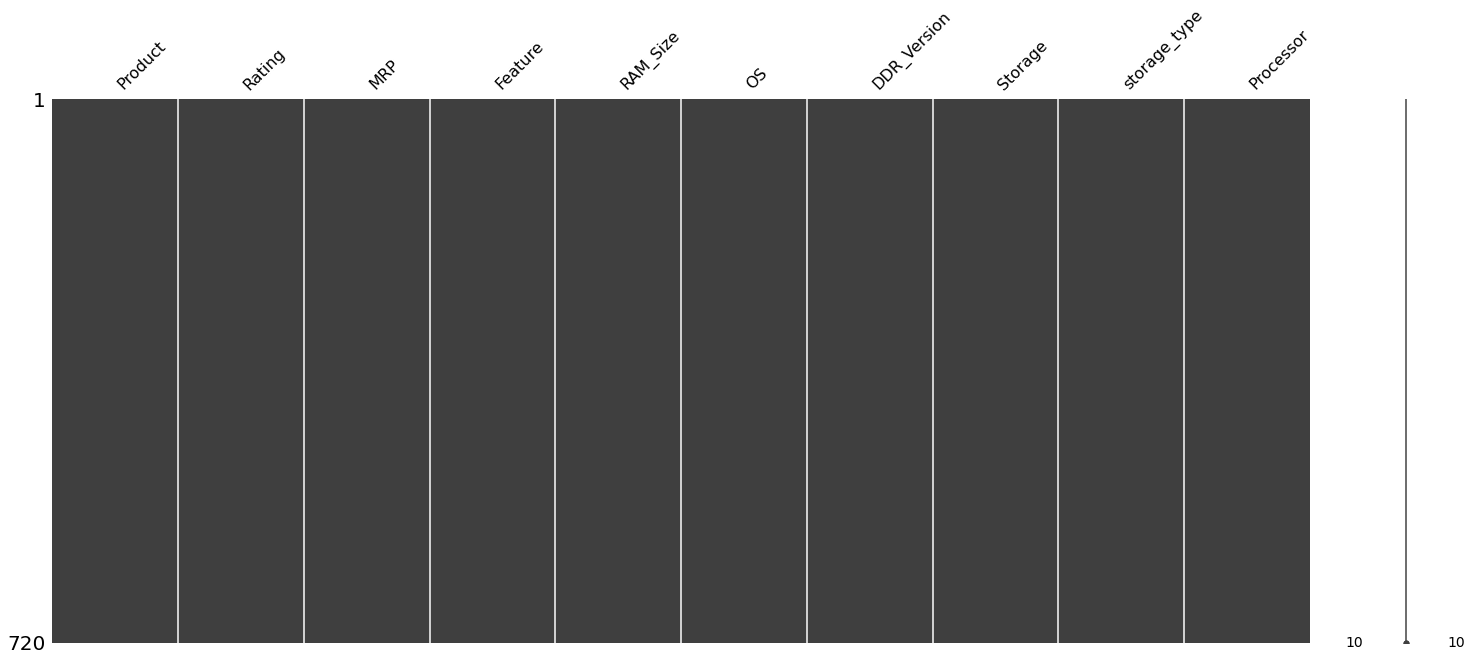

In [41]:
mno.matrix(df)

 **Data is treated Well (HOPEFULLY :) )**

In [42]:
# For eda, lets create another dataframe(duplicate)
eda_df = df

In [43]:
eda_df

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage,storage_type,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,256,SSD,i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM 6...,8,Windows 10,4,512,SSD,Ryzen 5
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i5
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,8,64 bit Chrome,4,1024,HDD,Legacy
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM 6...,8,Windows 11,4,512,SSD,Ryzen 7
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM ...,16,Windows 11,5,1,SSD,Ryzen 9
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen) 16 GB LPDDR...,8,Windows 11,5,512,SSD,i7


In [44]:
eda_df

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage,storage_type,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,256,SSD,i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM 6...,8,Windows 10,4,512,SSD,Ryzen 5
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i5
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,8,64 bit Chrome,4,1024,HDD,Legacy
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM 6...,8,Windows 11,4,512,SSD,Ryzen 7
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM ...,16,Windows 11,5,1,SSD,Ryzen 9
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen) 16 GB LPDDR...,8,Windows 11,5,512,SSD,i7


**Preparing Data For Modeling**

In [45]:
model_df = df

In [46]:
model_df

,Product,Rating,MRP,Feature,RAM_Size,OS,DDR_Version,Storage,storage_type,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,256,SSD,i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM 6...,8,Windows 10,4,512,SSD,Ryzen 5
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen) 8 GB DDR4 R...,8,Windows 11,4,512,SSD,i5
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,8,64 bit Chrome,4,1024,HDD,Legacy
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM 6...,8,Windows 11,4,512,SSD,Ryzen 7
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM ...,16,Windows 11,5,1,SSD,Ryzen 9
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen) 16 GB LPDDR...,8,Windows 11,5,512,SSD,i7


In [47]:
# We dont need Product, Rating, Feature Columns, so lets drop them off.
model_df = model_df.drop(['Product','Rating','Feature'],axis = 1)

In [48]:
model_df

,MRP,RAM_Size,OS,DDR_Version,Storage,storage_type,Processor
0,36990,8,Windows 11,4,256,SSD,i3
1,39990,8,Windows 11,4,512,SSD,i3
2,32990,8,Windows 11,4,512,SSD,i3
3,49990,8,Windows 10,4,512,SSD,Ryzen 5
4,49990,8,Windows 11,4,512,SSD,i5
...,...,...,...,...,...,...,...
715,23490,8,64 bit Chrome,4,1024,HDD,Legacy
716,73490,8,Windows 11,4,512,SSD,Ryzen 7
717,194990,16,Windows 11,5,1,SSD,Ryzen 9
718,125990,8,Windows 11,5,512,SSD,i7


In [49]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MRP           720 non-null    int32 
 1   RAM_Size      720 non-null    int32 
 2   OS            720 non-null    object
 3   DDR_Version   720 non-null    int64 
 4   Storage       720 non-null    int32 
 5   storage_type  720 non-null    object
 6   Processor     720 non-null    object
dtypes: int32(3), int64(1), object(3)
memory usage: 31.1+ KB


In [50]:
# Lets Transform our features into int which can be used for modeling.
model_df['OS'].value_counts()

Windows 11       561
Windows 10       129
MacOS             19
64 bit Chrome      9
64 bit DOS         2
Name: OS, dtype: int64

In [51]:
def encoder(column):
    if column == "Windows 11":
        return 0
    elif column == "Windows 10":
        return 1
    elif column == "MacOS":
        return 2
    elif column == "64 bit Chrome":
        return 3
    elif column == "64 bit DOS":
        return 4
    
model_df['OS_enc'] = model_df['OS'].apply(encoder)

In [52]:
model_df['OS_enc'].value_counts()
model_df = model_df.drop('OS',axis = 1)

In [53]:
model_df.info()
model_df['storage_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MRP           720 non-null    int32 
 1   RAM_Size      720 non-null    int32 
 2   DDR_Version   720 non-null    int64 
 3   Storage       720 non-null    int32 
 4   storage_type  720 non-null    object
 5   Processor     720 non-null    object
 6   OS_enc        720 non-null    int64 
dtypes: int32(3), int64(2), object(2)
memory usage: 31.1+ KB


SSD    666
HDD     54
Name: storage_type, dtype: int64

In [54]:
def encoder(column):
    if column == "HDD":
        return 0
    elif column == "SSD":
        return 1
model_df['Storage_Type'] = model_df['storage_type'].apply(encoder)

In [55]:
model_df = model_df.drop('storage_type',axis = 1)

In [56]:
model_df

,MRP,RAM_Size,DDR_Version,Storage,Processor,OS_enc,Storage_Type
0,36990,8,4,256,i3,0,1
1,39990,8,4,512,i3,0,1
2,32990,8,4,512,i3,0,1
3,49990,8,4,512,Ryzen 5,1,1
4,49990,8,4,512,i5,0,1
...,...,...,...,...,...,...,...
715,23490,8,4,1024,Legacy,3,0
716,73490,8,4,512,Ryzen 7,0,1
717,194990,16,5,1,Ryzen 9,0,1
718,125990,8,5,512,i7,0,1


In [57]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MRP           720 non-null    int32 
 1   RAM_Size      720 non-null    int32 
 2   DDR_Version   720 non-null    int64 
 3   Storage       720 non-null    int32 
 4   Processor     720 non-null    object
 5   OS_enc        720 non-null    int64 
 6   Storage_Type  720 non-null    int64 
dtypes: int32(3), int64(3), object(1)
memory usage: 31.1+ KB


In [58]:
df['Processor'].value_counts()

i5         159
i3         135
Ryzen 5     91
Ryzen 9     87
Ryzen 7     81
i7          56
Ryzen 3     48
Legacy      33
M1          14
i9          11
M2           5
Name: Processor, dtype: int64

In [59]:
def encoder(column):
    if column == "i5":
        return 0
    elif column == "i3":
        return 1
    elif column == "i7":
        return 2
    elif column == "i9":
        return 3
    elif column == "M1":
        return 4
    elif column == "M2":
        return 5
    elif column == "Ryzen 3":
        return 6
    elif column == "Ryzen 5":
        return 7
    elif column == "Ryzen 7":
        return 8
    elif column == "Ryzen 9":
        return 9
    elif column == "Legacy":
        return 10
    

model_df['processor'] = model_df['Processor'].apply(encoder)
model_df = model_df.drop('Processor',axis = 1)
model_df
    

,MRP,RAM_Size,DDR_Version,Storage,OS_enc,Storage_Type,processor
0,36990,8,4,256,0,1,1
1,39990,8,4,512,0,1,1
2,32990,8,4,512,0,1,1
3,49990,8,4,512,1,1,7
4,49990,8,4,512,0,1,0
...,...,...,...,...,...,...,...
715,23490,8,4,1024,3,0,10
716,73490,8,4,512,0,1,8
717,194990,16,5,1,0,1,9
718,125990,8,5,512,0,1,2


In [60]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MRP           720 non-null    int32
 1   RAM_Size      720 non-null    int32
 2   DDR_Version   720 non-null    int64
 3   Storage       720 non-null    int32
 4   OS_enc        720 non-null    int64
 5   Storage_Type  720 non-null    int64
 6   processor     720 non-null    int64
dtypes: int32(3), int64(4)
memory usage: 31.1 KB


In [61]:
model_df.to_csv('model_data.csv')

**All The Data Is Encoded**

# Models

In [62]:
data = pd.read_csv('model_data.csv')

In [63]:
data

,Unnamed: 0,MRP,RAM_Size,DDR_Version,Storage,OS_enc,Storage_Type,processor
0,0,36990,8,4,256,0,1,1
1,1,39990,8,4,512,0,1,1
2,2,32990,8,4,512,0,1,1
3,3,49990,8,4,512,1,1,7
4,4,49990,8,4,512,0,1,0
...,...,...,...,...,...,...,...,...
715,715,23490,8,4,1024,3,0,10
716,716,73490,8,4,512,0,1,8
717,717,194990,16,5,1,0,1,9
718,718,125990,8,5,512,0,1,2


In [64]:
data = data.drop('Unnamed: 0', axis = 1)
data

,MRP,RAM_Size,DDR_Version,Storage,OS_enc,Storage_Type,processor
0,36990,8,4,256,0,1,1
1,39990,8,4,512,0,1,1
2,32990,8,4,512,0,1,1
3,49990,8,4,512,1,1,7
4,49990,8,4,512,0,1,0
...,...,...,...,...,...,...,...
715,23490,8,4,1024,3,0,10
716,73490,8,4,512,0,1,8
717,194990,16,5,1,0,1,9
718,125990,8,5,512,0,1,2


In [65]:
X = data.drop('MRP',axis = 1) # MRP IS OUR TARGET
y = data['MRP'] 

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)
preds = lr.predict(X_test)

preds

array([ 74057.21859312,  74057.21859312,  42790.46274587,  38355.51012941,
        42790.46274587, 124063.04454014,  68406.51448139,  93378.47552867,
        38355.51012941,  38355.51012941, 124063.04454014,  93378.47552867,
        46494.39527886,  54043.98107874,  38989.07478891,  56099.93072093,
        74956.22496773,  38355.51012941,  54043.98107874,  38355.51012941,
        90210.6522312 ,  42790.46274587, 277348.92604931,  42790.46274587,
       124696.60919964,  53410.41641925,  38989.07478891,  38355.51012941,
        56312.7980016 ,  56733.49538043, 124696.60919964, 176865.27337089,
       124063.04454014,  42790.46274587, 142379.31640245,  57367.06003992,
        90210.6522312 ,  54043.98107874,  38355.51012941,  93378.47552867,
        56099.93072093,  38355.51012941,  28749.97468734,  54043.98107874,
       172430.32075443, 176865.27337089,  42156.89808637, 176865.27337089,
        74956.22496773, 124063.04454014,  42156.89808637,  42790.46274587,
        88943.52291222,  

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(preds,y_test))
mae = mean_absolute_error(preds,y_test)

print("RMSE : ",rmse)
print("MAE : ",mae)


RMSE :  29143.821277119438
MAE :  19407.221032120837


In [69]:
from sklearn.metrics import r2_score

score = r2_score(preds,y_test)
print("Accuracy: {:.2f}%".format(score*100))

Accuracy: 69.82%


**NO TUNING BY DEFAULT ACCURACY (R^2) : 69%**

# Decision Tree Regressor 

In [70]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)
preds = dtr.predict(X_test)

score = r2_score(preds,y_test)
print("Accuracy: {:.2f}%".format(score*100))

Accuracy: 84.34%


**Accuracy of Decision Tree Regressor : 84%**

# Random Forest Regressor 

In [71]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

RFR.fit(X_train,y_train)
preds = RFR.predict(X_test)

score = r2_score(preds,y_test)
print("Accuracy: {:.2f}%".format(score*100))

Accuracy: 86.14%


**Random Forest Classifier is giving a better Accuracy of 86% Out of all models without any tuning**

# Sprint-2

# Tune HyperParameters

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score:", test_score * 100)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test score: 88.18522954922499
